# TextMining 

## 학습목표
- 텍스트 마이닝의 개념과 프로세스를 이해할 수 있다.
- 실제 사용하는 텍스트 데이터를 활용하여 유의미한 결과를 추출할 수 있다.

### 텍스트 마이닝(Text Mining)
- NLP(Natyral Language Processing) : 자연어 처리
- Text Mining : 자연어 처리를 통하여 텍스트 데이터로부터 유의미한 결과를 추출하는 과정

#### 텍스트 마이닝 종류
- 텍스트 분류 : 텍스트가 속하는 카테고리를 분류하는 분석
- 감성 분석 : 텍스트에서 나타나는 감정/기분/의도 등을 분석
- 텍스트 요약 : 텍스트에서 중요한 주제를 나타내는 키워드, 문장을 추출/생성
- 텍스트 군집화 및 유사도 측정 : 텍스트의 비슷한 정도를 추출하고 그룹화하는 분석

####  텍스트 마이닝 프로세스
1. 텍스트 데이터 수집
    - crawling, 설문조사, csv 등을 통하여 수집
2. 텍스트 전처리
    - 용도에 맞게 테그트 전처리하는 과정
    - 불용어 제거(stop words) : 데이터에서 의미없는 단어를 제거
    - 정규화, 어간추출, 표제어추출 등 데이터의 가중치를 주는 방법
    - 정제(cleaning) : 정규표현식을 활용하여 의미없는 데이터를 삭제, 제거 (ex : 특수문자, ㅋㅋㅋ, ㅎㅎㅎ) 
3. 토큰화(Tokenization)
    - 토큰이라는 작은 단위로 나누는 과정
    - 나누는 기준은 데이터분석에 따라 다르게 설정
4. 특징값 추출
    - 중요한 단어를 선별하는 과정
5. 데이터 분석
    - 학습을 통한 데이터 분석

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('./data/naver_shopping.txt', sep = '\t', header = None)

In [5]:
data.columns = ['평점','리뷰']

In [6]:
data

,평점,리뷰
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [7]:
# 모든행의 리뷰데이터만 추출
data['리뷰']

0                                                   배공빠르고 굿
1                             택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2         아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3         선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                         민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
                                ...                        
199995                                      장마라그런가!!! 달지않아요
199996    다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997                      로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998                                        넘이쁘고 쎄련되보이네요~
199999     아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다
Name: 리뷰, Length: 200000, dtype: object

In [8]:
data['리뷰'][:1000]

0                                                배공빠르고 굿
1                          택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2      아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3      선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                      민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
                             ...                        
995    연료필터가 작업중 부러져서 새로 구매했습니다. 플라스틱이라 약한데 금속이었으면 좋다...
996    빠른배송에 감사드리지만 제품두께가 두꺼워서 핀이 바닥 코너에 붙여지지 않아 매끄럽지...
997    상품은 좋습니다! 배송이 너무 아쉬웠어요.. 3월1일날 주문했는데 배송까지 한달 넘...
998                 색상이 화면보다 탁해요 오렌지색은 아니예요.. 다른건 만족합니다~
999    파일로 힘줘서 해도 잘 안갈아져요. 그냥 손톱가위로 자르는게 낫고요~헤이큐티가 펄이...
Name: 리뷰, Length: 1000, dtype: object

In [9]:
data.loc[:999,'리뷰']

0                                                배공빠르고 굿
1                          택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2      아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3      선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                      민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
                             ...                        
995    연료필터가 작업중 부러져서 새로 구매했습니다. 플라스틱이라 약한데 금속이었으면 좋다...
996    빠른배송에 감사드리지만 제품두께가 두꺼워서 핀이 바닥 코너에 붙여지지 않아 매끄럽지...
997    상품은 좋습니다! 배송이 너무 아쉬웠어요.. 3월1일날 주문했는데 배송까지 한달 넘...
998                 색상이 화면보다 탁해요 오렌지색은 아니예요.. 다른건 만족합니다~
999    파일로 힘줘서 해도 잘 안갈아져요. 그냥 손톱가위로 자르는게 낫고요~헤이큐티가 펄이...
Name: 리뷰, Length: 1000, dtype: object

In [10]:
data[data['평점'] >= 5]['리뷰']

0                                                   배공빠르고 굿
2         아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
4                         민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
10                                    사이즈도 딱이고 귀엽고 넘 좋아요 ㅎㅎ
14                                     촉감도 좋고 무게감이나 핏도 편합니다
                                ...                        
199993                         포장이 넘 놀라웠으나 ㅎㅎ 상한곳없이 와 다행이네요
199996    다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997                      로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998                                        넘이쁘고 쎄련되보이네요~
199999     아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다
Name: 리뷰, Length: 81177, dtype: object

In [11]:
# 말뭉치(corpus) : 텍스트마이닝, 자연어처리에서 사용되는 전체 데이터셋
# 문서(document) : 말뭉치를 구성하는 개별 text 요소
# 빈도를 세기 위한 토큰화 실시(띄어쓰기)
tokens = []
for doc in data.loc[:1000,'리뷰']:
    for t in doc.split(' '):
        tokens.append(t)

In [12]:
tokens

['배공빠르고',
 '굿',
 '택배가',
 '엉망이네용',
 '저희집',
 '밑에층에',
 '말도없이',
 '놔두고가고',
 '아주좋아요',
 '바지',
 '정말',
 '좋아서2개',
 '더',
 '구매했어요',
 '이가격에',
 '대박입니다.',
 '바느질이',
 '조금',
 '엉성하긴',
 '하지만',
 '편하고',
 '가성비',
 '최고예요.',
 '선물용으로',
 '빨리',
 '받아서',
 '전달했어야',
 '하는',
 '상품이었는데',
 '머그컵만',
 '와서',
 '당황했습니다.',
 '전화했더니',
 '바로주신다했지만',
 '배송도',
 '누락되어있었네요..',
 '확인안하고',
 '바로',
 '선물했으면',
 '큰일날뻔했네요..이렇게',
 '배송이',
 '오래걸렸으면',
 '사는거',
 '다시',
 '생각했을거같아요',
 '아쉽네요..',
 '민트색상',
 '예뻐요.',
 '옆',
 '손잡이는',
 '거는',
 '용도로도',
 '사용되네요',
 'ㅎㅎ',
 '비추합니다',
 '계란',
 '뒤집을',
 '때',
 '완전',
 '불편해요',
 'ㅠㅠ',
 '코팅도',
 '묻어나고',
 '보기엔',
 '예쁘고',
 '실용적으로',
 '보였는데',
 '생각보다',
 '진짜',
 '별로입니다.',
 '주문을',
 '11월6에',
 '시켰는데',
 '11월16일에',
 '배송이',
 '왔네요',
 'ㅎㅎㅎ',
 '여기',
 '회사측과는',
 '전화도',
 '안되고',
 '아무런',
 '연락을',
 '받을수가',
 '없으니',
 '답답하신',
 '분들은',
 '다른곳에서',
 '사시는거',
 '추천드립니다',
 '넉넉한',
 '길이로',
 '주문했는데도',
 '안',
 '맞네요',
 '별로예요',
 '보폴이',
 '계속',
 '때처럼',
 '나오다가',
 '지금은',
 '안나네요~',
 '110인데',
 '전문속옷브랜드',
 '위생팬티105보다',
 '작은듯해요.',
 '불편해요.',
 '밴딩부분이',
 '다',
 '신축성없는',
 '일반실로',
 '되어있

In [13]:
# 빈도 세기 -> 빈도가 높은 상위 20개 데이터 확인
from collections import Counter
counter = Counter(tokens)
counter.most_common(20)

[('너무', 110),
 ('잘', 91),
 ('재구매', 81),
 ('좋아요', 48),
 ('그냥', 44),
 ('다', 42),
 ('좀', 40),
 ('많이', 34),
 ('더', 28),
 ('정말', 25),
 ('생각보다', 25),
 ('배송이', 22),
 ('ㅠㅠ', 22),
 ('배송도', 20),
 ('또', 20),
 ('배송', 20),
 ('좋네요', 20),
 ('조금', 19),
 ('좋고', 18),
 ('같아요', 17)]

##### 정규표현식(Regular Expression)
- 특정한 규칙을 가진 문자열의 집합을 표현하는 언어
- 전화번호, 이메일 처럼 패턴이 있는 문자열을 검색, 치환하는 도구 사용
- 특정 패턴에 일치하는 데이터를 삭제하는 도구 사용
- 특정 규칙이 있는 텍스트 데이터를 빠르게 정제할때 사용
- 패턴 : https://wikidocs.net/21703

In [14]:
import re

In [15]:
# 전체 데이터에서 핸드폰번호만 검출
# compile(규칙)
p = re.compile('010-?[0-9]{4}-?\\d{4}')

In [16]:
# search (문장, 문서)
p.search('안녕하세요 제 전화번호는 010-1253-5478입니다')

<re.Match object; span=(14, 27), match='010-1253-5478'>

In [17]:
p.search('tel: 01012345678')

<re.Match object; span=(5, 16), match='01012345678'>

- 쇼핑리뷰데이터 전처리
    - 숫자
    - 알파벳(대소문자)
    - 문장부호
    - 반복적인글자(ㅋㅋㅋ,ㅎㅎ,ㅠㅠ)

In [18]:
# 패턴생성
p2 = re.compile('[0-9a-zA-Z!?.ㅋㅎㅇ~-]+')

In [19]:
# 반복문 진행상황 로딩바 출력
from tqdm import tqdm
clean_reviews = [] # 전처리가 끝난 데이터를 담을 리스트
for doc in tqdm(data['리뷰']): # 배송데이터가 포함된 리뷰 반복문 처리
    temp_tokens = [] # 임시로 토큰을 저장할 리스트
    for t in doc.split(' '): # 띄어쓰기 단위로 토큰화
        if p2.search(t): # 지정된 패턴 검출
            continue # 건너뛰기
        temp_tokens.append(t) # 깔끔한 토큰을 리스트에 추가
    clean_reviews.append(' '.join(temp_tokens)) # 하나의 문자열로 만들어 전체 리스트에 추가
            

100%|█████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:01<00:00, 106832.97it/s]


In [20]:
clean_reviews

['배공빠르고 굿',
 '택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고',
 '아주좋아요 바지 정말 더 구매했어요 이가격에 바느질이 조금 엉성하긴 하지만 편하고 가성비',
 '선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 전화했더니 바로주신다했지만 배송도 확인안하고 바로 선물했으면 배송이 오래걸렸으면 사는거 다시 생각했을거같아요',
 '민트색상 옆 손잡이는 거는 용도로도 사용되네요',
 '비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적으로 보였는데 생각보다 진짜',
 '주문을 시켰는데 배송이 왔네요 여기 회사측과는 전화도 안되고 아무런 연락을 받을수가 없으니 답답하신 분들은 다른곳에서 사시는거 추천드립니다',
 '넉넉한 길이로 주문했는데도 안 맞네요 별로예요',
 '보폴이 계속 때처럼 나오다가 지금은',
 '전문속옷브랜드 밴딩부분이 다 신축성없는 일반실로 되어있어 빅사이즈임에도 입고벗을때 편하게 밴딩부분이 늘어나고 입었을때도 밴딩이 잡아주어야하는데',
 '사이즈도 딱이고 귀엽고 넘 좋아요',
 '베이지 색 구매했는데 약간 살색에 가까워요',
 '화면빨인가봐요;; 노란컬러가 돋보여요;; 저렴한맛에 그냥 씁니다',
 '별루',
 '촉감도 좋고 무게감이나 핏도 편합니다',
 '불멍하기좋고 사이즈도 너무 좋아요',
 '재구매 친구들이 좋은 향 난다고 해요',
 '실내에서 신는건지 몰랐어요',
 '재구매 다 좋은데 하나가 이상하네요',
 '가게를 운영하는 사장님께서 대신 구매 해달라고 하셔서 구매하게되었는데 가게에 달아놓으니까 이쁘네요',
 '가성비 괜찮습니다 바퀴가 고정된다면',
 '화장이 깨끗하게 지워지지않아요 거품이생기고 오랫동안 문질러서 씻어내야하지만 세정력이 별로인듯해요',
 '남자 애들 인데 너무 좋아요 유해성분없어 초등들도 바르기좋아요',
 '채집통이 결착이 채집통이 결착이 안되서 커터칼로 결착 부분과 모서리 부분을 깍아 냈더니 겨우 결착이 부분은 제품 불량 이슈 같구요 보내시기 전에 최소한의 

In [21]:
data['리뷰']

0                                                   배공빠르고 굿
1                             택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2         아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3         선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                         민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
                                ...                        
199995                                      장마라그런가!!! 달지않아요
199996    다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997                      로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998                                        넘이쁘고 쎄련되보이네요~
199999     아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다
Name: 리뷰, Length: 200000, dtype: object

In [23]:
pd.DataFrame({'전처리 전' : data['리뷰'],'전처리 후' :clean_reviews})

,전처리 전,전처리 후
0,배공빠르고 굿,배공빠르고 굿
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,아주좋아요 바지 정말 더 구매했어요 이가격에 바느질이 조금 엉성하긴 하지만 편하고 가성비
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 전화했더니 바로주...
4,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,민트색상 옆 손잡이는 거는 용도로도 사용되네요
...,...,...
199995,장마라그런가!!! 달지않아요,달지않아요
199996,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,넘이쁘고 쎄련되보이네요~,넘이쁘고


- 띄어쓰기 교정 도구를 활용해야함!
- !가 붙어있는 문장 자체가 사라짐

#### 형태소 분석하기 

In [25]:
from kiwipiepy import Kiwi

In [26]:
# 형태소 분석기 객체 생성
kiwi = Kiwi()

In [27]:
kiwi.tokenize("아버지가방에들어가신다")

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가', tag='JKS', start=3, len=1),
 Token(form='방', tag='NNG', start=4, len=1),
 Token(form='에', tag='JKB', start=5, len=1),
 Token(form='들어가', tag='VV', start=6, len=3),
 Token(form='시', tag='EP', start=9, len=1),
 Token(form='ᆫ다', tag='EF', start=9, len=2)]

- 가장 최신의 형태소분석기이기 때문에, 띄어쓰기까지 교정해줌

In [29]:
kiwi.space("아버지가방에들어가신다!!!!")

'아버지가 방에 들어가신다!!!!'

- 특수문자는 띄어쓰기를 해주지 않음.
- 텍스트 형태는 내가 원하는 형태로 어떻게 전처리를 할지 고민하는 것이 중요!
- 띄어쓰기 교정 : space()를 활용해 미리 전처리하기 전에 교정해는 게 중요

#### 불용어 처리
- stopwords : 사용하지 않는 단어를 지정하여 제거

In [30]:
from kiwipiepy.utils import Stopwords

In [31]:
sw = Stopwords()

In [33]:
kiwi.tokenize('아버지가방에들어가신다',stopwords=sw)

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='방', tag='NNG', start=4, len=1),
 Token(form='들어가', tag='VV', start=6, len=3),
 Token(form='시', tag='EP', start=9, len=1)]

In [42]:
kiwi.tokenize(data['리뷰'][0])

[Token(form='배', tag='NNG', start=0, len=1),
 Token(form='공', tag='NNG', start=1, len=1),
 Token(form='빠르', tag='VA', start=2, len=2),
 Token(form='고', tag='EC', start=4, len=1),
 Token(form='굿', tag='NNG', start=6, len=1)]

In [43]:
toknize = [kiwi.tokenize(r) for r in data['리뷰']]


In [45]:
counter = Counter()

In [47]:
toknize

[[Token(form='배', tag='NNG', start=0, len=1),
  Token(form='공', tag='NNG', start=1, len=1),
  Token(form='빠르', tag='VA', start=2, len=2),
  Token(form='고', tag='EC', start=4, len=1),
  Token(form='굿', tag='NNG', start=6, len=1)],
 [Token(form='택배', tag='NNG', start=0, len=2),
  Token(form='가', tag='JKS', start=2, len=1),
  Token(form='엉망', tag='NNG', start=4, len=2),
  Token(form='이', tag='VCP', start=6, len=1),
  Token(form='네요', tag='EF', start=7, len=2),
  Token(form='ᆼ', tag='Z_CODA', start=8, len=1),
  Token(form='저희', tag='NP', start=10, len=2),
  Token(form='집', tag='NNG', start=12, len=1),
  Token(form='밑', tag='NNG', start=14, len=1),
  Token(form='에', tag='JKB', start=15, len=1),
  Token(form='층', tag='NNG', start=16, len=1),
  Token(form='에', tag='JKB', start=17, len=1),
  Token(form='말', tag='NNG', start=19, len=1),
  Token(form='도', tag='JX', start=20, len=1),
  Token(form='없이', tag='MAG', start=21, len=2),
  Token(form='놔두', tag='VV', start=24, len=2),
  Token(form='고', t

In [32]:
sw.add(('에','JKB'),('가','JKS'),('이','VCP'),('에','JKB'),('고','EC'),('도','JX'),('어서','EC'),('더','MAG'),('으로','JKB'),('거','NNB'),('',''),('',''),('','')) # add 에 단어와 품사를 등록해줘야함! > 실행하면 sw에 업데이트 됨..

- 이모지제거

In [48]:
#패키지 설치 
!pip install emoji

   ---------------------------------------- 0.0/608.4 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/608.4 kB ? eta -:--:--
   ---------------------------------------- 608.4/608.4 kB 10.7 MB/s  0:00:00


In [49]:
import emoji

In [50]:
emoji.replace_emoji("😐😑😏🙄🙃 이 쇼핑몰 너무 좋아요~")

' 이 쇼핑몰 너무 좋아요~'

- 감성분석할때는 이모지가 도움이 될 수 있음. > 이미지의 의미를 살리고 싶은 경우

In [51]:
emoji.demojize("😐😑😏🙄🙃 이 쇼핑몰 너무 좋아요~") # 영어로 이모지를 표현함.

':neutral_face::expressionless_face::smirking_face::face_with_rolling_eyes::upside-down_face: 이 쇼핑몰 너무 좋아요~'

- 리뷰데이터는 오타 혹은 띄어쓰기를 잘 안되어있는 경우가 많음

### 실습
- 주방, 가전 데이터를 활용해

In [60]:
reviews = pd.read_csv("./data/TS_3-3.주방가전_csv.csv")

In [67]:
reviews

,INDEX,도메인,카테고리,상품명,상품평,데이터구분
0,2007,가전,주방가전,(TV)○○ 간편쿡 자동불꽃조절 가스레인지_3구 일반,일반가스레인지지만 화재사고없이 조절기능도있고 스마트한게 좋습니다.디자인은 실버생상이...,쇼핑몰
1,2008,가전,주방가전,(TV)OO IH 인덕션_2만세일,사용하는데 자꾸 꺼지네요 ㅠㅠ 본사에 AS요청했더니 수거해서 봐야한다고 가져갔어요...,쇼핑몰
2,2009,가전,주방가전,(TV)OO IH 인덕션_2만세일,삼식을 해야하는 여름 방학을 대비하여 구매했습니다. 가스렌지와 다르게 집안 온도를 ...,쇼핑몰
3,2010,가전,주방가전,(TV)OO IH 인덕션_2만세일,추석 앞이라 그런지 배송이 조금 늦긴 했지만\n제품 성능하나는 끝내주는것 같아요.\...,쇼핑몰
4,2011,가전,주방가전,(TV_특)쿠** 하이브리드 전기레인지 프리미엄형 (IH2구+HL1구),전기레인지는 가격대비 만족!^^\n\n전기레인지는 괜찮으나 사은품은 좀 엉망이네요....,쇼핑몰
...,...,...,...,...,...,...
9996,88021,가전,주방가전,비** ○○ R** (2021년형) 코타,사이즈도 크고 마음에 듭니다. 김치가 맛있게 익기만을 기대합니다. 가격대비 저렴하게...,쇼핑몰
9997,88022,가전,주방가전,비** ○○ R** (2021년형) 코타,일반 냉장고로 사용 가능 하고~ 김치 냉장고로도 사용 가능~ 일석이조 기능이네요. ...,쇼핑몰
9998,88023,가전,주방가전,비** ○○ R** (2021년형) 코타,색감이 너무 예뻐요~ 진짜 주방이 깔끔해 보입니다. 냉장고 사이즈도 슬림해서 공간도...,쇼핑몰
9999,88024,가전,주방가전,비** ○○ R** (2021년형) 코타,내부 수납 공간이 많아서 아주 마음에 듭니다. 소리가 아주 조용하니 밤에도 고요해서...,쇼핑몰


In [71]:
reviews['카테고리'].unique()

array(['주방가전'], dtype=object)

- 상품평 데이터셋을 활용하여 워드클라우드 만들기
#### 전처리
- 띄어쓰기 교정
- 이모지 제거
- 정규표현식을 활용한 불필요한 글자 제거
- 형태소 분석 (동사,형용사,명사 & 1글자 단어 제외)

1. 띄어쓰기 교정
   - 상품평 컬럼의 각 리뷰 문장에 대해 kiwi 라이브러리가 가지는 space함수를 적용 > apply 함수를 활용해 space함수 적용

## 📌 일반 함수 vs 람다 함수 (lambda)

파이썬에서 `apply()`를 사용할 때  
**일반 함수**와 **람다 함수(lambda)** 두 가지 방식으로 처리할 수 있다.

---

✔ 일반함수

```python
def space_fix(x):
    return kiwi.space(x)

reviews['리뷰_전처리'] = reviews['상품평'].apply(space_fix)
```
---
✔ 람다 함수 (lambda)
```python
reviews['리뷰_전처리'] = reviews['상품평'].apply(lambda x: kiwi.space(x))
```
 
---
- 일반함수 : 정의 후에 호출하는 방식
- 람다함수 : 일회용 함수. 정의와 호출을 동시에 , 실행해야하는 실행문이 짧을때


In [75]:
reviews['상품평 전처리'] = reviews['상품평'].apply(lambda x: kiwi.space(x)) # Series의 리뷰 한줄이 x로 분리되서 적용됨

In [76]:
reviews

,INDEX,도메인,카테고리,상품명,상품평,데이터구분,상품평 전처리
0,2007,가전,주방가전,(TV)○○ 간편쿡 자동불꽃조절 가스레인지_3구 일반,일반가스레인지지만 화재사고없이 조절기능도있고 스마트한게 좋습니다.디자인은 실버생상이...,쇼핑몰,일반 가스 레인지지만 화재 사고 없이 조절 기능도 있고 스마트한 게 좋습니다. 디자...
1,2008,가전,주방가전,(TV)OO IH 인덕션_2만세일,사용하는데 자꾸 꺼지네요 ㅠㅠ 본사에 AS요청했더니 수거해서 봐야한다고 가져갔어요...,쇼핑몰,사용하는데 자꾸 꺼지네요 ㅠㅠ 본사에 AS 요청했더니 수거해서 봐야한다고 가져갔어...
2,2009,가전,주방가전,(TV)OO IH 인덕션_2만세일,삼식을 해야하는 여름 방학을 대비하여 구매했습니다. 가스렌지와 다르게 집안 온도를 ...,쇼핑몰,삼 식을 해야하는 여름 방학을 대비하여 구매했습니다. 가스렌지와 다르게 집안 온도를...
3,2010,가전,주방가전,(TV)OO IH 인덕션_2만세일,추석 앞이라 그런지 배송이 조금 늦긴 했지만\n제품 성능하나는 끝내주는것 같아요.\...,쇼핑몰,추석 앞이라 그런지 배송이 조금 늦긴했지만\n제품 성능 하나는 끝내주는 것 같아요....
4,2011,가전,주방가전,(TV_특)쿠** 하이브리드 전기레인지 프리미엄형 (IH2구+HL1구),전기레인지는 가격대비 만족!^^\n\n전기레인지는 괜찮으나 사은품은 좀 엉망이네요....,쇼핑몰,전기레인지는 가격 대비 만족! ^^\n\n전기레인지는 괜찮으나 사은품은 좀 엉망이네...
...,...,...,...,...,...,...,...
9996,88021,가전,주방가전,비** ○○ R** (2021년형) 코타,사이즈도 크고 마음에 듭니다. 김치가 맛있게 익기만을 기대합니다. 가격대비 저렴하게...,쇼핑몰,사이즈도 크고 마음에 듭니다. 김치가 맛있게 익기만을 기대합니다. 가격 대비 저렴하...
9997,88022,가전,주방가전,비** ○○ R** (2021년형) 코타,일반 냉장고로 사용 가능 하고~ 김치 냉장고로도 사용 가능~ 일석이조 기능이네요. ...,쇼핑몰,일반 냉장고로 사용 가능 하고~ 김치 냉장고로도 사용 가능~ 일석이조 기능이네요. ...
9998,88023,가전,주방가전,비** ○○ R** (2021년형) 코타,색감이 너무 예뻐요~ 진짜 주방이 깔끔해 보입니다. 냉장고 사이즈도 슬림해서 공간도...,쇼핑몰,색감이 너무 예뻐요~ 진짜 주방이 깔끔해 보입니다. 냉장고 사이즈도 슬림해서 공간도...
9999,88024,가전,주방가전,비** ○○ R** (2021년형) 코타,내부 수납 공간이 많아서 아주 마음에 듭니다. 소리가 아주 조용하니 밤에도 고요해서...,쇼핑몰,내부 수납 공간이 많아서 아주 마음에 듭니다. 소리가 아주 조용하니 밤에도 고요해서...


- 이모지 제거
  - 람다함수 사용하여 이모지 제거 후 '상품평_전처리' 컬럼에 업데이트

In [79]:
reviews['상품평 전처리'] = reviews['상품평 전처리'].apply(lambda x : emoji.replace_emoji(x))

In [80]:
reviews['상품평 전처리']

0        일반 가스 레인지지만 화재 사고 없이 조절 기능도 있고 스마트한 게 좋습니다. 디자...
1        사용하는데 자꾸 꺼지네요 ㅠㅠ  본사에 AS 요청했더니 수거해서 봐야한다고 가져갔어...
2        삼 식을 해야하는 여름 방학을 대비하여 구매했습니다. 가스렌지와 다르게 집안 온도를...
3        추석 앞이라 그런지 배송이 조금 늦긴했지만\n제품 성능 하나는 끝내주는 것 같아요....
4        전기레인지는 가격 대비 만족! ^^\n\n전기레인지는 괜찮으나 사은품은 좀 엉망이네...
                               ...                        
9996     사이즈도 크고 마음에 듭니다. 김치가 맛있게 익기만을 기대합니다. 가격 대비 저렴하...
9997     일반 냉장고로 사용 가능 하고~ 김치 냉장고로도 사용 가능~ 일석이조 기능이네요. ...
9998     색감이 너무 예뻐요~ 진짜 주방이 깔끔해 보입니다. 냉장고 사이즈도 슬림해서 공간도...
9999     내부 수납 공간이 많아서 아주 마음에 듭니다. 소리가 아주 조용하니 밤에도 고요해서...
10000    허리를 안 구부리고 김치 통을 넣을 수 있어서 편리하고 좋습니다. 색상도 차분하고 ...
Name: 상품평 전처리, Length: 10001, dtype: object

- 정규표현식을 활용한 불필요한 문자 제거
  - ㅋㅎㅠ?!

In [83]:
p = re.compile("[ㅋㅎㅠ?!]+")
# 정규표현식을 활용하여 바로 적용
reviews['상품평 전처리'] = reviews['상품평 전처리'].apply(lambda x: re.sub(p,"",x))

In [84]:
reviews.head()

,INDEX,도메인,카테고리,상품명,상품평,데이터구분,상품평 전처리
0,2007,가전,주방가전,(TV)○○ 간편쿡 자동불꽃조절 가스레인지_3구 일반,일반가스레인지지만 화재사고없이 조절기능도있고 스마트한게 좋습니다.디자인은 실버생상이...,쇼핑몰,일반 가스 레인지지만 화재 사고 없이 조절 기능도 있고 스마트한 게 좋습니다. 디자...
1,2008,가전,주방가전,(TV)OO IH 인덕션_2만세일,사용하는데 자꾸 꺼지네요 ㅠㅠ 본사에 AS요청했더니 수거해서 봐야한다고 가져갔어요...,쇼핑몰,사용하는데 자꾸 꺼지네요 본사에 AS 요청했더니 수거해서 봐야한다고 가져갔어요 ...
2,2009,가전,주방가전,(TV)OO IH 인덕션_2만세일,삼식을 해야하는 여름 방학을 대비하여 구매했습니다. 가스렌지와 다르게 집안 온도를 ...,쇼핑몰,삼 식을 해야하는 여름 방학을 대비하여 구매했습니다. 가스렌지와 다르게 집안 온도를...
3,2010,가전,주방가전,(TV)OO IH 인덕션_2만세일,추석 앞이라 그런지 배송이 조금 늦긴 했지만\n제품 성능하나는 끝내주는것 같아요.\...,쇼핑몰,추석 앞이라 그런지 배송이 조금 늦긴했지만\n제품 성능 하나는 끝내주는 것 같아요....
4,2011,가전,주방가전,(TV_특)쿠** 하이브리드 전기레인지 프리미엄형 (IH2구+HL1구),전기레인지는 가격대비 만족!^^\n\n전기레인지는 괜찮으나 사은품은 좀 엉망이네요....,쇼핑몰,전기레인지는 가격 대비 만족 ^^\n\n전기레인지는 괜찮으나 사은품은 좀 엉망이네요...


- 하나의 전체를 문장을 받아서, lambda함수로 적용하면 문자열에 붙어있는 !도 삭제할 수 있음

#### 형태소 분석
- 일반명사, 동사, 형용사 만 추출하여 워드클라우드 만들기

| 태그    | 의미    | 이유       |
| ----- | ----- | -------- |
| `NNG` | 일반 명사 | 핵심 키워드   |
| `VA`  | 형용사   | 감성 표현    |
| `VV`  | 동사    | 행위·상태 표현 |
 

#### kiwi에서 사용하는 형태소 종류 및 키워드

| 품사  | 의미         |
| --- | ---------- |
| NNG | 일반 명사      |
| NNP | 고유 명사      |
| NNB | 의존 명사      |
| NP  | 대명사        |
| VV  | 동사         |
| VA  | 형용사        |
| VCP | 긍정 지정사     |
| VCN | 부정 지정사     |
| MAG | 일반 부사      |
| MAJ | 접속 부사      |
| JKS | 주격 조사      |
| JKO | 목적격 조사     |
| JKB | 부사격 조사     |
| JX  | 보조사        |
| EC  | 연결 어미      |
| EF  | 종결 어미      |
| EP  | 선어말 어미     |
| ETM | 관형형 전성 어미  |
| ETN | 명사형 전성 어미  |
| XSV | 동사 파생 접미사  |
| XSA | 형용사 파생 접미사 |
 

In [99]:
# 사용자 정의함수를 활용하여 형태소 분석 후에 특정 품사만 담는 코드를 작성!
def tokenize_review(s):
    token = kiwi.tokenize(s)
    result = [t.form for t in token if t.tag in ['NNG','VA','VV']]
    return result

In [100]:
reviews['상품평 전처리'].apply(tokenize_review)

0        [일반, 가스, 레인지, 화재, 사고, 조절, 기능, 있, 스마트, 좋, 디자인, ...
1        [사용, 꺼지, 본사, 요청, 수거, 보, 가져가, 전기, 렌지, 사용, 끓, 하,...
2        [식, 하, 여름, 방학, 대비, 구매, 가스렌지, 다르, 집안, 온도, 높이, 좋...
3        [추석, 앞, 배송, 늦, 제품, 성능, 끝내주, 같, 배송, 라면, 끊이, 먹, ...
4        [가격, 대비, 만족, 전기, 레인지, 괜찮, 사은품, 엉망, 사은품, 주, 감사,...
                               ...                        
9996        [사이즈, 크, 마음, 들, 김치, 맛있, 익, 기대, 가격, 대비, 저렴하, 사]
9997     [일반, 냉장고, 사용, 가능, 하, 김치, 냉장고, 사용, 가능, 일석이조, 기능...
9998           [색감, 예쁘, 주방, 보이, 냉장고, 사이즈, 슬림, 공간, 차, 하, 좋]
9999                  [내부, 수납, 공간, 많, 마음, 들, 소리, 밤, 고요, 좋]
10000    [허리, 구부리, 김치, 통, 넣, 있, 편리, 좋, 색상, 고급, 집, 구조, 주...
Name: 상품평 전처리, Length: 10001, dtype: object

In [97]:
def tokenize_review(text):
    token = kiwi.tokenize(text)
    result = []
    for t in token:
        if t.tag in ['NNG','VV','VA']:
            result.append(t.form)
    return result

In [98]:
reviews['상품평 전처리'].apply(tokenize_review)

0        [일반, 가스, 레인지, 화재, 사고, 조절, 기능, 있, 스마트, 좋, 디자인, ...
1        [사용, 꺼지, 본사, 요청, 수거, 보, 가져가, 전기, 렌지, 사용, 끓, 하,...
2        [식, 하, 여름, 방학, 대비, 구매, 가스렌지, 다르, 집안, 온도, 높이, 좋...
3        [추석, 앞, 배송, 늦, 제품, 성능, 끝내주, 같, 배송, 라면, 끊이, 먹, ...
4        [가격, 대비, 만족, 전기, 레인지, 괜찮, 사은품, 엉망, 사은품, 주, 감사,...
                               ...                        
9996        [사이즈, 크, 마음, 들, 김치, 맛있, 익, 기대, 가격, 대비, 저렴하, 사]
9997     [일반, 냉장고, 사용, 가능, 하, 김치, 냉장고, 사용, 가능, 일석이조, 기능...
9998           [색감, 예쁘, 주방, 보이, 냉장고, 사이즈, 슬림, 공간, 차, 하, 좋]
9999                  [내부, 수납, 공간, 많, 마음, 들, 소리, 밤, 고요, 좋]
10000    [허리, 구부리, 김치, 통, 넣, 있, 편리, 좋, 색상, 고급, 집, 구조, 주...
Name: 상품평 전처리, Length: 10001, dtype: object

In [104]:
#lambda 함수를 활용하여 한줄코드를 작성하기
reviews['형태소'] = reviews['상품평 전처리'].apply(lambda x: [t.form for t in kiwi.tokenize(x) if t.tag in ['NNG','VV','VA']])

- 한글자 데이터 제거

In [107]:
reviews['형태소 전처리'] = reviews['형태소'].apply(lambda x: [text for text in x if len(text)>= 2])

In [108]:
reviews['형태소 전처리']

0        [일반, 가스, 레인지, 화재, 사고, 조절, 기능, 스마트, 디자인, 실버, 크기...
1        [사용, 꺼지, 본사, 요청, 수거, 가져가, 전기, 렌지, 사용, 구입, 플러그,...
2        [여름, 방학, 대비, 구매, 가스렌지, 다르, 집안, 온도, 높이, 화력, 소음,...
3        [추석, 배송, 제품, 성능, 끝내주, 배송, 라면, 끊이, 전도, 사용, 편리, ...
4        [가격, 대비, 만족, 전기, 레인지, 괜찮, 사은품, 엉망, 사은품, 감사, 스텐...
                               ...                        
9996                    [사이즈, 마음, 김치, 맛있, 기대, 가격, 대비, 저렴하]
9997     [일반, 냉장고, 사용, 가능, 김치, 냉장고, 사용, 가능, 일석이조, 기능, 내...
9998                    [색감, 예쁘, 주방, 보이, 냉장고, 사이즈, 슬림, 공간]
9999                              [내부, 수납, 공간, 마음, 소리, 고요]
10000                [허리, 구부리, 김치, 편리, 색상, 고급, 구조, 주방, 마음]
Name: 형태소 전처리, Length: 10001, dtype: object

In [109]:
def filter_short_token(text):
    result = []
    for t in text:
        if len(t)>=2:
            result.append(t)
    return result

In [110]:
reviews['형태소'].apply(filter_short_token)

0        [일반, 가스, 레인지, 화재, 사고, 조절, 기능, 스마트, 디자인, 실버, 크기...
1        [사용, 꺼지, 본사, 요청, 수거, 가져가, 전기, 렌지, 사용, 구입, 플러그,...
2        [여름, 방학, 대비, 구매, 가스렌지, 다르, 집안, 온도, 높이, 화력, 소음,...
3        [추석, 배송, 제품, 성능, 끝내주, 배송, 라면, 끊이, 전도, 사용, 편리, ...
4        [가격, 대비, 만족, 전기, 레인지, 괜찮, 사은품, 엉망, 사은품, 감사, 스텐...
                               ...                        
9996                    [사이즈, 마음, 김치, 맛있, 기대, 가격, 대비, 저렴하]
9997     [일반, 냉장고, 사용, 가능, 김치, 냉장고, 사용, 가능, 일석이조, 기능, 내...
9998                    [색감, 예쁘, 주방, 보이, 냉장고, 사이즈, 슬림, 공간]
9999                              [내부, 수납, 공간, 마음, 소리, 고요]
10000                [허리, 구부리, 김치, 편리, 색상, 고급, 구조, 주방, 마음]
Name: 형태소, Length: 10001, dtype: object

- 토큰화 n-gram
  - n개의 연속된 단어를 하나로 취급하는 방법
  - 예를 들어 "러시아 월드컵"이라는 표현을 "러시아"와 "월드컵" 두개의 독립된 단어로만 취급하지 않고 두 단어로 구성된 하나의 토큰으로 취급
    - n=2 경우를 bi-gram이라고도 부름
    - 단어의 개수가 늘어난 효과

### N-gram
- 연속적인 단어를 토큰으로 등록하는 방법
  - 1-gram (유니그램) : 한 단어를 토큰으로 사용
  - 2-gram (바이그램) : 두 단어를 토큰으로 사용
  - 3-gram (트라이그램) : 세 단어를 토큰으로 사용 
  - 주의사항 : 너무 과하게 n-gram을 사용하면 토큰화의 의미가 감소함.

In [111]:
from nltk.util import ngrams

In [115]:
# 토큰화된 데이터 
sample_tokens = ['I','like','ice','cream']
# 바이그램 적용
list(ngrams(sample_tokens,2))

[('I', 'like'), ('like', 'ice'), ('ice', 'cream')]

In [116]:
def make_bi_token(tokens):
    bi_tokens = list(ngrams(tokens,2))
    return tokens+[" ".join(bi) for bi in bi_tokens]

In [118]:
make_bi_token(sample_tokens)

['I', 'like', 'ice', 'cream', 'I like', 'like ice', 'ice cream']

In [123]:
reviews['형태소_bi'] = reviews['형태소 전처리'].apply(make_bi_token)

In [124]:
print(reviews['형태소_bi'][0])

['일반', '가스', '레인지', '화재', '사고', '조절', '기능', '스마트', '디자인', '실버', '크기', '들어맞', '사용', '용도', '설치', '기사', '정하', '오래', '동안', '사용', '일반 가스', '가스 레인지', '레인지 화재', '화재 사고', '사고 조절', '조절 기능', '기능 스마트', '스마트 디자인', '디자인 실버', '실버 크기', '크기 들어맞', '들어맞 사용', '사용 용도', '용도 설치', '설치 기사', '기사 정하', '정하 오래', '오래 동안', '동안 사용']


- counter를 사용하려면 현재 리스트별로 되어있는 문장을 풀어서 전체 하나의 리스트로 만들어서 counter에 전달 해야함!

In [125]:
reviews.head()

,INDEX,도메인,카테고리,상품명,상품평,데이터구분,상품평 전처리,형태소,형태소 전처리,형태소_bi
0,2007,가전,주방가전,(TV)○○ 간편쿡 자동불꽃조절 가스레인지_3구 일반,일반가스레인지지만 화재사고없이 조절기능도있고 스마트한게 좋습니다.디자인은 실버생상이...,쇼핑몰,일반 가스 레인지지만 화재 사고 없이 조절 기능도 있고 스마트한 게 좋습니다. 디자...,"[일반, 가스, 레인지, 화재, 사고, 조절, 기능, 있, 스마트, 좋, 디자인, ...","[일반, 가스, 레인지, 화재, 사고, 조절, 기능, 스마트, 디자인, 실버, 크기...","[일반, 가스, 레인지, 화재, 사고, 조절, 기능, 스마트, 디자인, 실버, 크기..."
1,2008,가전,주방가전,(TV)OO IH 인덕션_2만세일,사용하는데 자꾸 꺼지네요 ㅠㅠ 본사에 AS요청했더니 수거해서 봐야한다고 가져갔어요...,쇼핑몰,사용하는데 자꾸 꺼지네요 본사에 AS 요청했더니 수거해서 봐야한다고 가져갔어요 ...,"[사용, 꺼지, 본사, 요청, 수거, 보, 가져가, 전기, 렌지, 사용, 끓, 하,...","[사용, 꺼지, 본사, 요청, 수거, 가져가, 전기, 렌지, 사용, 구입, 플러그,...","[사용, 꺼지, 본사, 요청, 수거, 가져가, 전기, 렌지, 사용, 구입, 플러그,..."
2,2009,가전,주방가전,(TV)OO IH 인덕션_2만세일,삼식을 해야하는 여름 방학을 대비하여 구매했습니다. 가스렌지와 다르게 집안 온도를 ...,쇼핑몰,삼 식을 해야하는 여름 방학을 대비하여 구매했습니다. 가스렌지와 다르게 집안 온도를...,"[식, 하, 여름, 방학, 대비, 구매, 가스렌지, 다르, 집안, 온도, 높이, 좋...","[여름, 방학, 대비, 구매, 가스렌지, 다르, 집안, 온도, 높이, 화력, 소음,...","[여름, 방학, 대비, 구매, 가스렌지, 다르, 집안, 온도, 높이, 화력, 소음,..."
3,2010,가전,주방가전,(TV)OO IH 인덕션_2만세일,추석 앞이라 그런지 배송이 조금 늦긴 했지만\n제품 성능하나는 끝내주는것 같아요.\...,쇼핑몰,추석 앞이라 그런지 배송이 조금 늦긴했지만\n제품 성능 하나는 끝내주는 것 같아요....,"[추석, 앞, 배송, 늦, 제품, 성능, 끝내주, 같, 배송, 라면, 끊이, 먹, ...","[추석, 배송, 제품, 성능, 끝내주, 배송, 라면, 끊이, 전도, 사용, 편리, ...","[추석, 배송, 제품, 성능, 끝내주, 배송, 라면, 끊이, 전도, 사용, 편리, ..."
4,2011,가전,주방가전,(TV_특)쿠** 하이브리드 전기레인지 프리미엄형 (IH2구+HL1구),전기레인지는 가격대비 만족!^^\n\n전기레인지는 괜찮으나 사은품은 좀 엉망이네요....,쇼핑몰,전기레인지는 가격 대비 만족 ^^\n\n전기레인지는 괜찮으나 사은품은 좀 엉망이네요...,"[가격, 대비, 만족, 전기, 레인지, 괜찮, 사은품, 엉망, 사은품, 주, 감사,...","[가격, 대비, 만족, 전기, 레인지, 괜찮, 사은품, 엉망, 사은품, 감사, 스텐...","[가격, 대비, 만족, 전기, 레인지, 괜찮, 사은품, 엉망, 사은품, 감사, 스텐..."


In [127]:
# 모든 리뷰의 형태소를 하나의 리스트로 합치기
all_tokens = sum(reviews['형태소_bi'],[])

In [134]:
counter = Counter(all_tokens)

In [135]:
top_100 = counter.most_common(100)

In [139]:
top_100

[('디자인', 2929),
 ('사용', 2649),
 ('만족', 2446),
 ('제품', 1938),
 ('기능', 1824),
 ('가격', 1719),
 ('배송', 1632),
 ('마음', 1618),
 ('구매', 1512),
 ('설치', 1258),
 ('생각', 1157),
 ('예쁘', 1118),
 ('저렴하', 1055),
 ('색상', 1032),
 ('편하', 1015),
 ('빠르', 961),
 ('사이즈', 945),
 ('용량', 943),
 ('소음', 880),
 ('이쁘', 843),
 ('성능', 796),
 ('불편', 730),
 ('기사', 650),
 ('세척', 630),
 ('맛있', 606),
 ('고급', 577),
 ('친절', 576),
 ('시간', 557),
 ('디자인 예쁘', 543),
 ('최고', 533),
 ('요리', 529),
 ('상품', 527),
 ('구입', 521),
 ('주방', 512),
 ('작동', 490),
 ('배송 빠르', 483),
 ('심플', 479),
 ('보이', 464),
 ('냉장고', 447),
 ('소리', 443),
 ('품질', 396),
 ('기분', 395),
 ('디자인 이쁘', 393),
 ('내부', 388),
 ('밥솥', 384),
 ('기사 친절', 378),
 ('들어가', 377),
 ('편리', 374),
 ('정도', 358),
 ('조리', 348),
 ('김치', 343),
 ('화이트', 343),
 ('주문', 341),
 ('음식', 336),
 ('화력', 334),
 ('버튼', 332),
 ('디자인 심플', 326),
 ('실망', 321),
 ('크기', 315),
 ('비싸', 311),
 ('걱정', 302),
 ('깔끔', 297),
 ('조작', 296),
 ('브랜드', 293),
 ('저렴하 가격', 292),
 ('냄새', 282),
 ('다양', 282),
 ('저렴하 구매', 281),


In [130]:
from wordcloud import WordCloud

In [137]:
import matplotlib.pyplot as plt

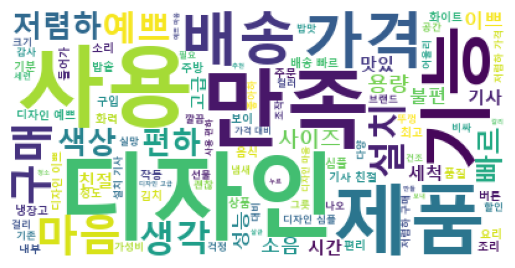

In [138]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white'    
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()